<a href="https://colab.research.google.com/github/fandrianarisataGithub/Data-science-projet-INSI-Malaria-CNN/blob/main/Memo_dsc_malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all of basic lib
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend

In [ ]:
 #unzip and load dataset, once
"""from zipfile import ZipFile

with ZipFile(
    '/content/drive/MyDrive/Malaria-dataset/dataset-malaria-gr.zip',
    'r'
) as zip:
  zip.extractall('/content/drive/MyDrive/Malaria-dataset')"""

"from zipfile import ZipFile\n\nwith ZipFile(\n   '/content/drive/MyDrive/Malaria-dataset/dataset-malaria-gr.zip',\n   'r'\n) as zip:\n zip.extractall('/content/drive/MyDrive/Malaria-dataset')"

In [ ]:
#check all dispo dir
os.listdir('/content/drive/MyDrive/Malaria-dataset')

In [ ]:
#check Parasitized data image in index 0
print(os.listdir('/content/drive/MyDrive/Malaria-dataset/Parasitized')[0])

In [ ]:
#check Uninfected data image in index 10 and its len
print(os.listdir('/content/drive/MyDrive/Malaria-dataset/Uninfected')[10])

In [ ]:
#source of grouped data image
parasitezedData = os.listdir('/content/drive/MyDrive/Malaria-dataset/Parasitized')
unParasitezedData = os.listdir('/content/drive/MyDrive/Malaria-dataset/Uninfected')

In [ ]:
#function to get image length inside a directory :
def count_image_files(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    image_count = 0

    for filename in os.listdir(directory):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

    return image_count



In [ ]:
#get length of parasitized image
length_parasitized = count_image_files('/content/drive/MyDrive/Malaria-dataset/Parasitized')
length_parasitized

In [ ]:
#get length of uninfected image
length_Uninfected = count_image_files('/content/drive/MyDrive/Malaria-dataset/Uninfected')
length_Uninfected

In [ ]:
#total images
total_image = length_parasitized + length_Uninfected
total_image

In [ ]:
#Combine all the images in one variable and simultaneously resize all image to  50, 50
# Data preprocessing.
dataArrayImage = []
labels = []

for i in parasitezedData:
    try:

        image = cv2.imread("/content/drive/MyDrive/Malaria-dataset/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        dataArrayImage.append(np.array(resize_img))
        dataArrayImage.append(np.array(rotated45))
        dataArrayImage.append(np.array(rotated75))
        dataArrayImage.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)

    except AttributeError:
        print('')

for u in unParasitezedData:
    try:

        image = cv2.imread("/content/drive/MyDrive/Malaria-dataset/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        dataArrayImage.append(np.array(resize_img))
        dataArrayImage.append(np.array(rotated45))
        dataArrayImage.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)

    except AttributeError:
        print('')

In [ ]:
#data augmentation
cells = np.array(dataArrayImage)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [ ]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96453, 50, 50, 3) | labels : (96453,)


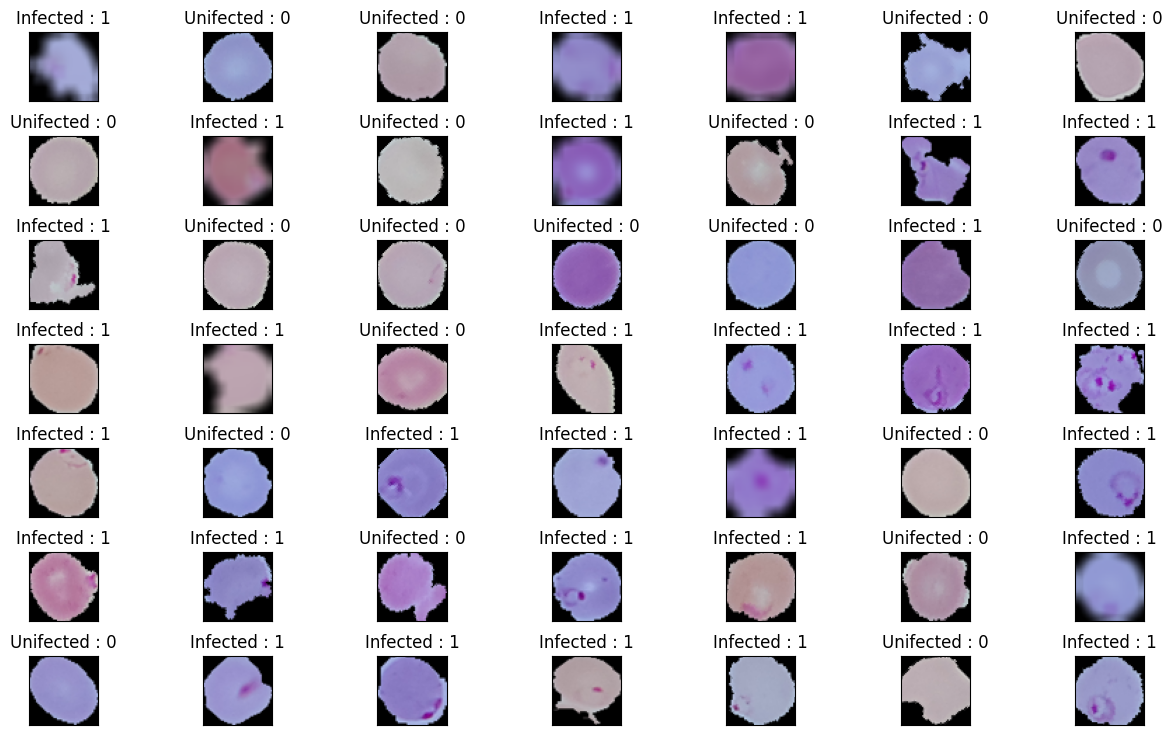

In [45]:
plt.figure(1 , figsize = (15 , 9))
n = 0
for i in range(49):
    n += 1
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [46]:
# load array as np array for all task
imageData = np.array(dataArrayImage)
labels = np.array(labels)
#test
print("imageData:",len(imageData))
print("labels:",len(labels))


imageData: 96453
labels: 96453


3 Parasitized :



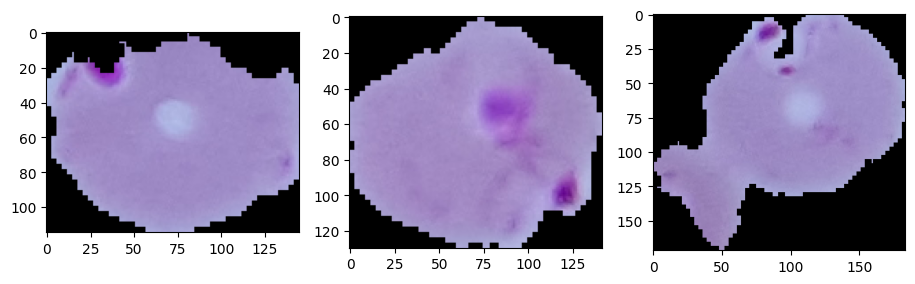

3 Uninfected:



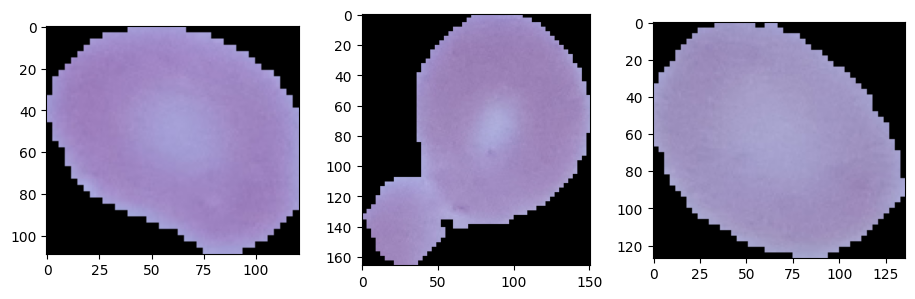

In [47]:
#data viz
print("3 Parasitized :\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/Malaria-dataset/Parasitized/'+ parasitezedData[i])
    plt.imshow(img)
plt.show()

print("3 Uninfected:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('/content/drive/MyDrive/Malaria-dataset/Uninfected/'+ unParasitezedData[i])
    plt.imshow(img)
plt.show()

In [48]:
#prepa train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imageData, labels, test_size = 0.2,random_state = 0)

y_train = utils.to_categorical(y_train, num_classes = 2)
y_test = utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 77162
X_test: 19291
y_train: 77162
y_test: 19291


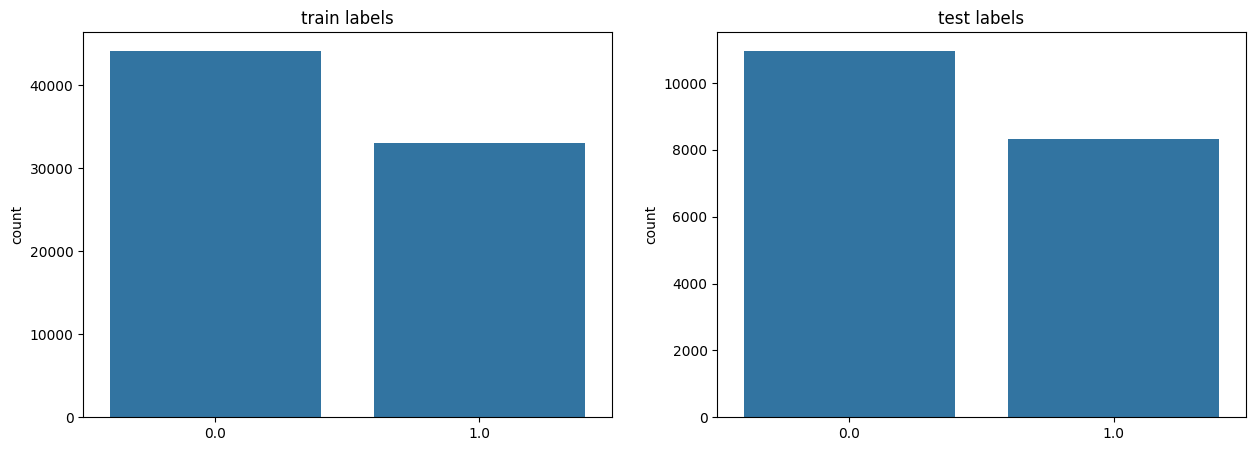

In [60]:
#Un peu de statistique pour la distribution des deux classes y_train et y_test
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1, figsize=(15, 5))
n = 0
for label_data, label in zip([y_train, y_test], ['train labels', 'test labels']):
    n += 1
    plt.subplot(1, 2, n)
    sns.countplot(x=label_data[:, 0])
    plt.title(label)
plt.show()

In [ ]:
#Use the CNN model

model = Sequential()

inputShape = (50, 50, 3)

if backend.image_data_format() == 'channels_first':
    inputShape = (3, 50, 50)

model.add(Conv2D(32, (3,3), activation='relu', input_shape=inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Set up logging for predictions
tensors_to_log = {'probabilities': 'softmax_tensor'}
logging_hook = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

In [31]:

#Compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
#model fitting
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
2412/2412 [==============================] - 454s 187ms/step - loss: 0.2734 - accuracy: 0.8951
Epoch 2/10
2412/2412 [==============================] - 464s 192ms/step - loss: 0.1570 - accuracy: 0.9470
Epoch 3/10
2412/2412 [==============================] - 481s 199ms/step - loss: 0.1472 - accuracy: 0.9505
Epoch 4/10
2412/2412 [==============================] - 447s 185ms/step - loss: 0.1399 - accuracy: 0.9532
Epoch 5/10
2412/2412 [==============================] - 447s 185ms/step - loss: 0.1312 - accuracy: 0.9565
Epoch 6/10
2412/2412 [==============================] - 450s 186ms/step - loss: 0.1249 - accuracy: 0.9579
Epoch 7/10
2412/2412 [==============================] - 459s 190ms/step - loss: 0.1201 - accuracy: 0.9598
Epoch 8/10
2412/2412 [==============================] - 455s 189ms/step - loss: 0.1140 - accuracy: 0.9612
Epoch 9/10
2412/2412 [==============================] - 452s 187ms/step - loss: 0.1120 - accuracy: 0.9615
Epoch 10/10
2412/2412 [=======================

In [33]:
model.save('my_model.h5')  # Save the model after initial training

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
model.fit(X_train, y_train, epochs=5, batch_size=32)  # Train for additional epochs

Epoch 1/5
2412/2412 [==============================] - 463s 192ms/step - loss: 0.1036 - accuracy: 0.9642
Epoch 2/5
2412/2412 [==============================] - 455s 189ms/step - loss: 0.1011 - accuracy: 0.9651
Epoch 3/5
2412/2412 [==============================] - 457s 189ms/step - loss: 0.1003 - accuracy: 0.9652
Epoch 4/5
2412/2412 [==============================] - 454s 188ms/step - loss: 0.0979 - accuracy: 0.9673
Epoch 5/5
2412/2412 [==============================] - 452s 187ms/step - loss: 0.0943 - accuracy: 0.9673


In [35]:
model.save('my_model.h5')  # Save the model after initial training

In [36]:
model.fit(X_train, y_train, epochs=5, batch_size=32)  # Train for additional epochs

Epoch 1/5
2412/2412 [==============================] - 455s 189ms/step - loss: 0.0908 - accuracy: 0.9686
Epoch 2/5
2412/2412 [==============================] - 460s 191ms/step - loss: 0.0912 - accuracy: 0.9687
Epoch 3/5
2412/2412 [==============================] - 450s 186ms/step - loss: 0.0908 - accuracy: 0.9689
Epoch 4/5
2412/2412 [==============================] - 446s 185ms/step - loss: 0.0876 - accuracy: 0.9702
Epoch 5/5
2412/2412 [==============================] - 455s 189ms/step - loss: 0.0853 - accuracy: 0.9702


In [41]:
model.save('my_model.h5')  # Save the model after initial training

In [38]:
model.fit(X_train, y_train, epochs=2, batch_size=32)  # Train for additional epochs

Epoch 1/2
2412/2412 [==============================] - 451s 187ms/step - loss: 0.0830 - accuracy: 0.9710
Epoch 2/2
2412/2412 [==============================] - 457s 189ms/step - loss: 0.0813 - accuracy: 0.9719


In [39]:
model.save('my_model.h5')  # Save the model after initial training

In [40]:
model.fit(X_train, y_train, epochs=3, batch_size=32)  # Train for additional epochs

Epoch 1/3
2412/2412 [==============================] - 464s 192ms/step - loss: 0.0813 - accuracy: 0.9712
Epoch 2/3
2412/2412 [==============================] - 456s 189ms/step - loss: 0.0795 - accuracy: 0.9726
Epoch 3/3
2412/2412 [==============================] - 458s 190ms/step - loss: 0.0794 - accuracy: 0.9721


In [42]:
model.save('my_model.h5')  # Save the model after initial training

In [44]:
#evaluation de l'ensemble de test en calculant la perte et la précision
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

603/603 [==============================] - 26s 43ms/step - loss: 0.1193 - accuracy: 0.9594
Loss:  0.11927929520606995
Accuracy:  95.94111442565918


In [61]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix

In [63]:
#Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)

603/603 [==============================] - 29s 49ms/step


In [64]:
# Convertir les prédictions en classes:
y_pred_classes = np.argmax(y_pred, axis=1)

In [67]:
print("y_train type:", type(y_train))
print("y_test type:", type(y_test))
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train type: <class 'numpy.ndarray'>
y_test type: <class 'numpy.ndarray'>
y_train shape: (77162, 2)
y_test shape: (19291, 2)


In [69]:
#Création de la matrice de confusion:
y_test_binary = np.argmax(y_test, axis=1)
confusion_mat = confusion_matrix(y_test_binary, y_pred_classes)
confusion_mat

array([[ 8205,   117],
       [  666, 10303]])

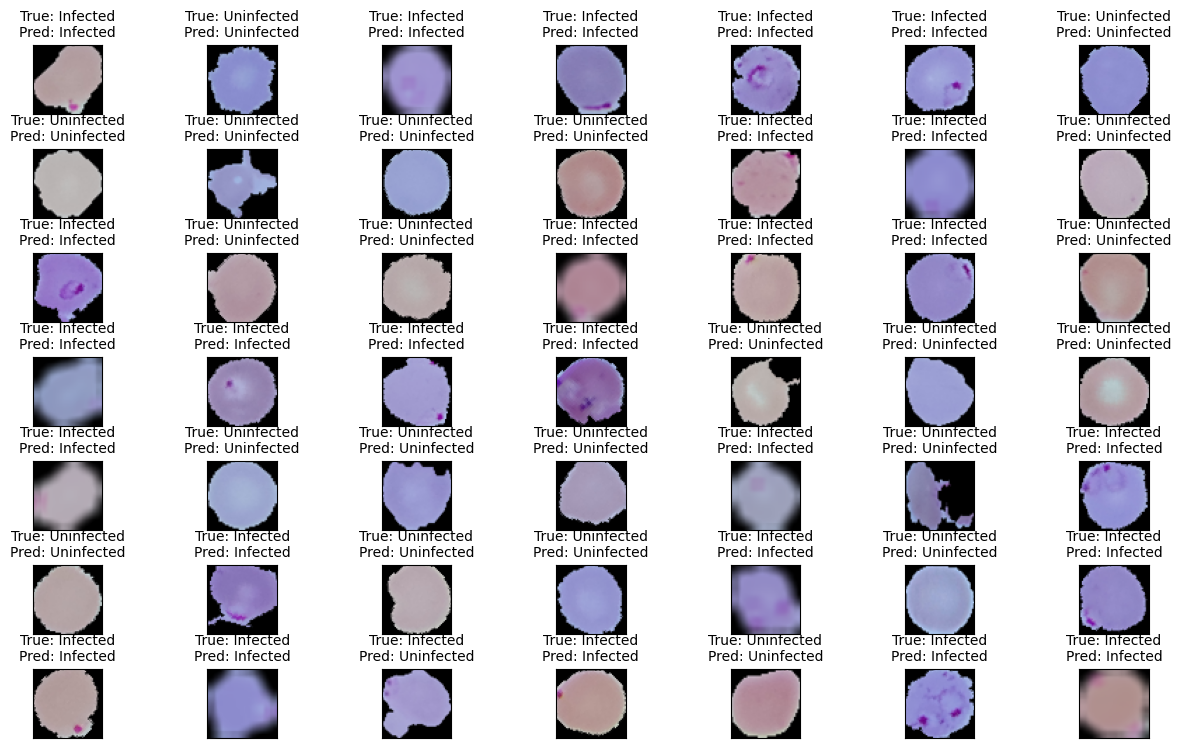

In [137]:
plt.figure(1, figsize=(15, 9))
n = 0

# Assuming one-hot encoded labels
classes = ["Uninfected", "Infected"]  # Define class names for readability

for i in range(49):
    n += 1
    r = np.random.randint(0, X_test.shape[0], 1)

    # Check if subplot position is within grid capacity
    if n <= 49:
        plt.subplot(7, 7, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)

        # Get true and predicted labels from y_test and y_pred
        true_label_index = np.argmax(y_test[r[0]])  # Convert one-hot encoded label to index
        predicted_label_index = np.argmax(y_pred[r[0]])
        true_label = classes[true_label_index]
        predicted_label = classes[predicted_label_index]

        plt.imshow(X_test[r[0]])
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)  # Clear title with labels
        plt.xticks([]), plt.yticks([])

plt.show()

In [138]:
#Saving model
%cd "/content/drive/MyDrive/Malaria-dataset"
model.save('model_malaria_version_1_00.h5')
from tensorflow.keras.models import load_model
model = load_model('model_malaria_version_1_00.h5')
model.summary()

/content/drive/MyDrive/Malaria-dataset


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0